# Exercise 3 — Linear Prediction

Importing libraries for the project

In [ ]:
import numpy as np
import soundfile as sr
import matplotlib.pyplot as plt
from scipy.linalg import solve_toeplitz
from scipy.signal import freqz
from scipy.signal import lfilter

Importing sound file

In [ ]:
speech1 = sr.read('resources/speech1.wav')

In [4]:
speech1[0].shape

(45466,)

In [5]:
print(f'The sampling rate of speech1 is: {speech1[1]}Hz')

The sampling rate of speech1 is: 16000Hz


In [6]:
sample_rate = speech1[1]

num_samples1 = speech1[0].shape[0]
speech1_data = speech1[0]

x1 = np.linspace(0, num_samples1, num=num_samples1, dtype=np.int32)

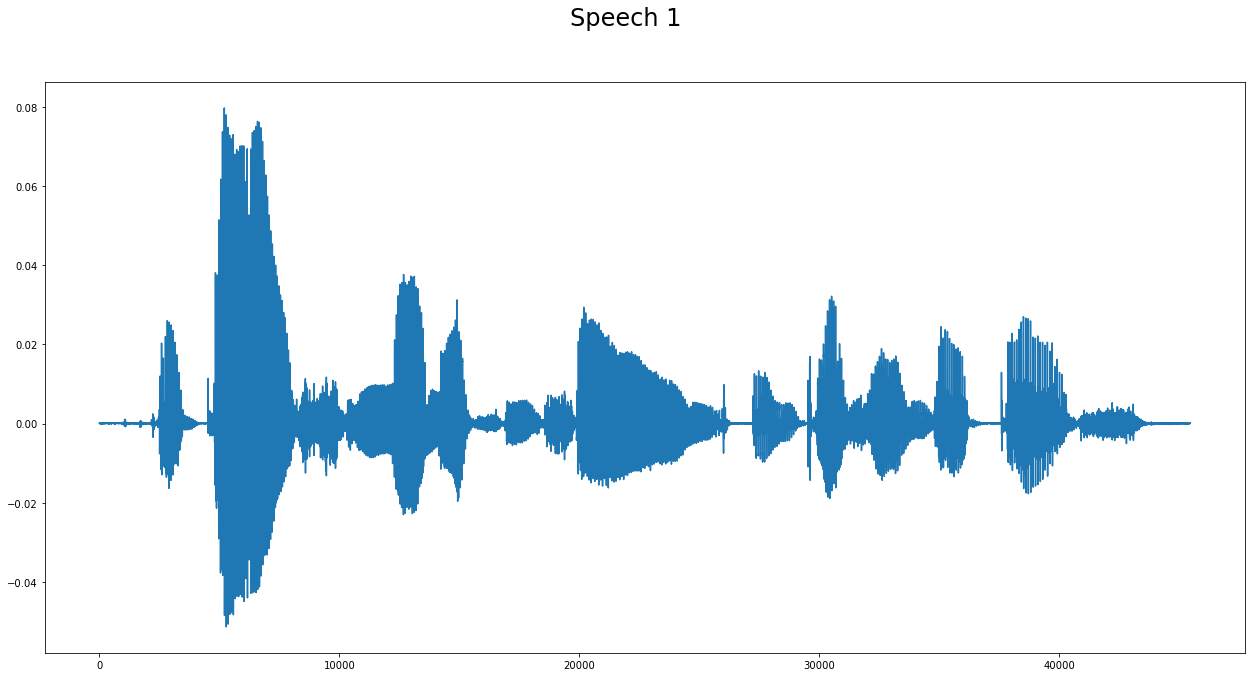

In [7]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.suptitle("Speech 1", fontsize=24)
plt.plot(x1, speech1_data)

In [8]:
frame_length = 32
frame_shift = 8
millis_per_sample = 1000 / sample_rate
frame_length_samples = int(frame_length / millis_per_sample)
frame_length_samples

512

In [9]:
#fig = plt.gcf()
#fig.set_size_inches(21.5, 10.5)
#x1_voiced = x1[5200:6200]
#plt.suptitle("Speech1 voiced segment", fontsize=24)
#plt.plot(x1_voiced, speech1_data[5200:6200])

In [10]:
speech1_data_voiced = speech1_data[5200:5200+frame_length_samples]

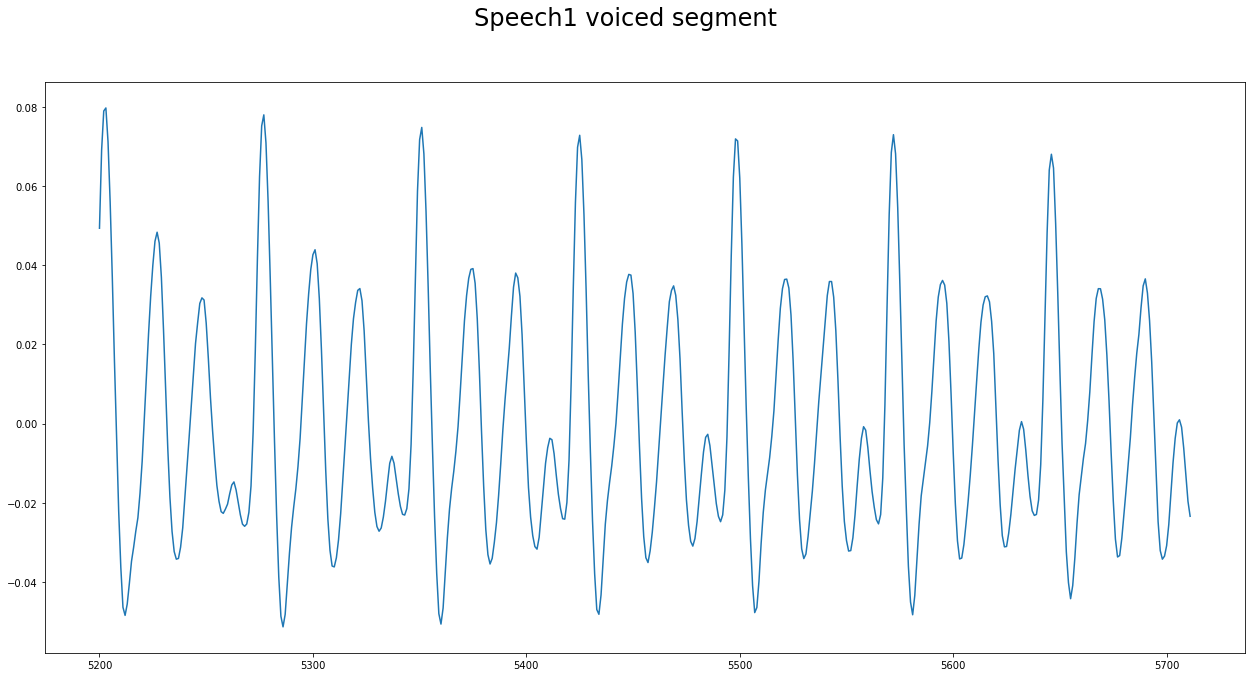

In [11]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
x1_voiced = x1[5200:5200+frame_length_samples]
plt.suptitle("Speech1 voiced segment", fontsize=24)
plt.plot(x1_voiced, speech1_data_voiced)

In [12]:
no_samples = 0.0032 * sample_rate
print(no_samples)

51.2


In [13]:
#fig = plt.gcf()
#fig.set_size_inches(21.5, 10.5)
#x1_unvoiced = x1[19000:20500]
#plt.suptitle("Speech1 unvoiced segment", fontsize=24)
#plt.plot(x1_unvoiced, speech1_data[19000:20500])

In [14]:
speech1_data_unvoiced = speech1_data[19000:19000+frame_length_samples]

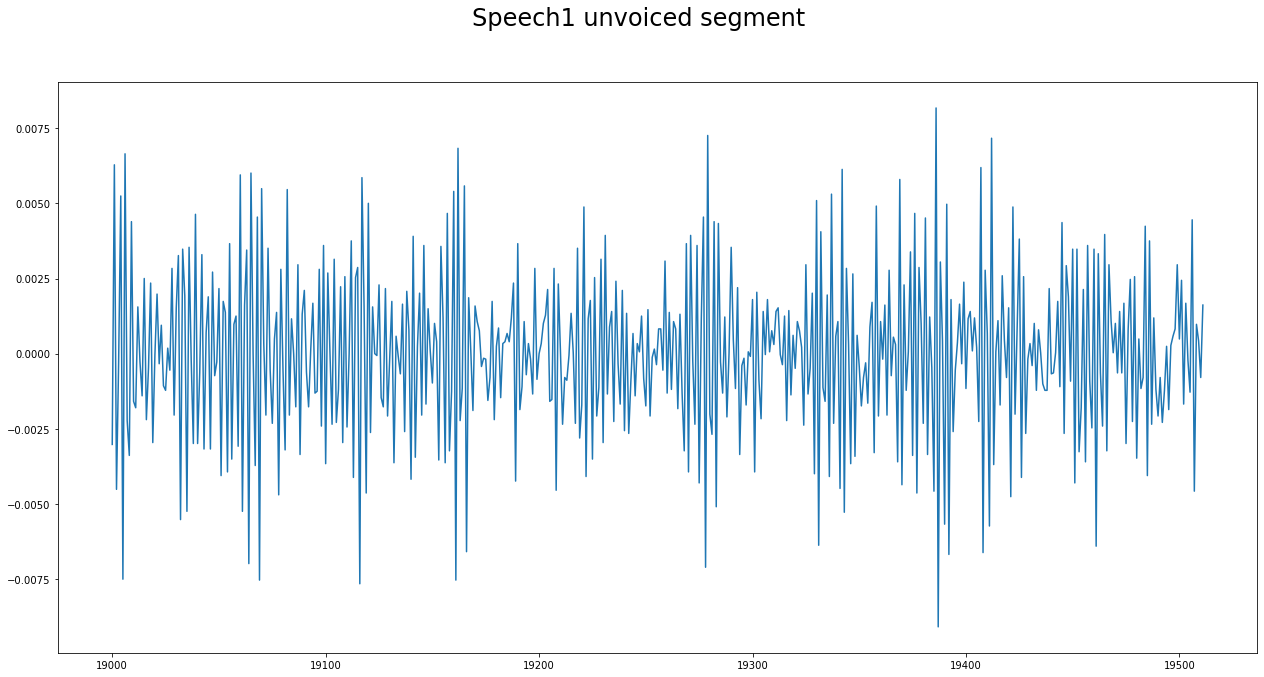

In [15]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
x1_unvoiced = x1[19000:19000+frame_length_samples]
plt.suptitle("Speech1 unvoiced segment", fontsize=24)
plt.plot(x1_unvoiced, speech1_data_unvoiced)

In [16]:
# Compute the Hann window
analysis_window = np.hanning(frame_length_samples)

x1_voiced_hann = speech1_data_voiced * analysis_window
x1_unvoiced_hann = speech1_data_unvoiced * analysis_window

In [17]:
autocorr_voiced = np.correlate(x1_voiced_hann, x1_voiced_hann, mode='full')
autocorr_voiced = autocorr_voiced[len(x1_voiced_hann)-1:len(x1_voiced_hann)+12]
autocorr_voiced[:-1].shape

(12,)

In [18]:
autocorr_voiced[:-1]

array([ 0.16339037,  0.15488374,  0.13070076,  0.09441359,  0.05100232,
        0.00584784, -0.03606549, -0.07073933, -0.09554265, -0.10933553,
       -0.11242082, -0.10627113])

In [20]:
autocorr_voiced[1:]

array([ 0.15488374,  0.13070076,  0.09441359,  0.05100232,  0.00584784,
       -0.03606549, -0.07073933, -0.09554265, -0.10933553, -0.11242082,
       -0.10627113, -0.0931884 ])

In [23]:
autocorr_voiced[1:].shape

(12,)

In [26]:
coefficients_voiced = solve_toeplitz((-1)*autocorr_voiced[:-1], autocorr_voiced[1:])
coefficients_voiced

array([-2.7598751 ,  2.74747825, -0.46944529, -1.35498685,  1.15932916,
        0.12301464, -0.89318144,  0.79663012, -0.4759765 ,  0.45430685,
       -0.44946775,  0.20929401])

In [27]:
autocorr_unvoiced = np.correlate(x1_unvoiced_hann, x1_unvoiced_hann, mode='full')
autocorr_unvoiced = autocorr_unvoiced[len(x1_unvoiced_hann)-1:len(x1_unvoiced_hann)+12]
autocorr_unvoiced[:-1].shape

(12,)

In [30]:
coefficients_unvoiced = solve_toeplitz((-1)*autocorr_unvoiced[:-1], autocorr_unvoiced[1:])
coefficients_unvoiced

array([ 0.8087156 ,  0.09680771, -0.37976429,  0.1309839 ,  0.13072863,
        0.07850801, -0.09542772, -0.01394769,  0.1512481 ,  0.24945309,
        0.110447  ,  0.01624608])

In [31]:
frequency_response_voiced = freqz(b = 1, a = np.concatenate(([1], coefficients_voiced)), worN=frame_length_samples, whole=True, fs=sample_rate) 

In [32]:
frequency_response_voiced[0].shape

(512,)

In [33]:
frequency_response_unvoiced = freqz(b = 1, a = np.concatenate(([1], coefficients_unvoiced)), worN=frame_length_samples, whole=True, fs=sample_rate) 

In [34]:
frequency_response_unvoiced[0].shape

(512,)

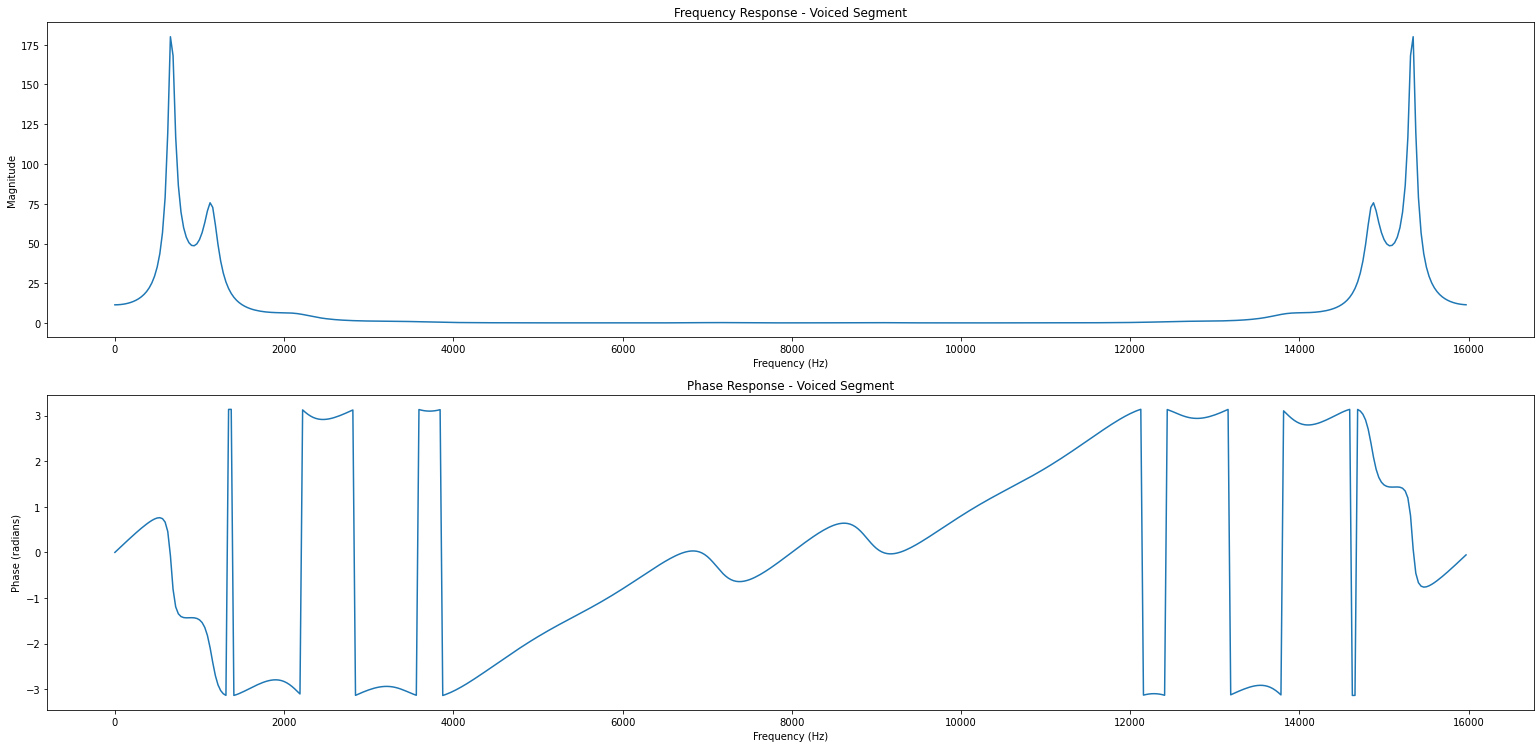

In [36]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.subplot(2, 1, 1)
plt.plot(frequency_response_voiced[0], np.abs(frequency_response_voiced[1]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Response - Voiced Segment')

plt.subplot(2, 1, 2)
plt.plot(frequency_response_voiced[0], np.angle(frequency_response_voiced[1]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.title('Phase Response - Voiced Segment')

plt.tight_layout()
plt.show()

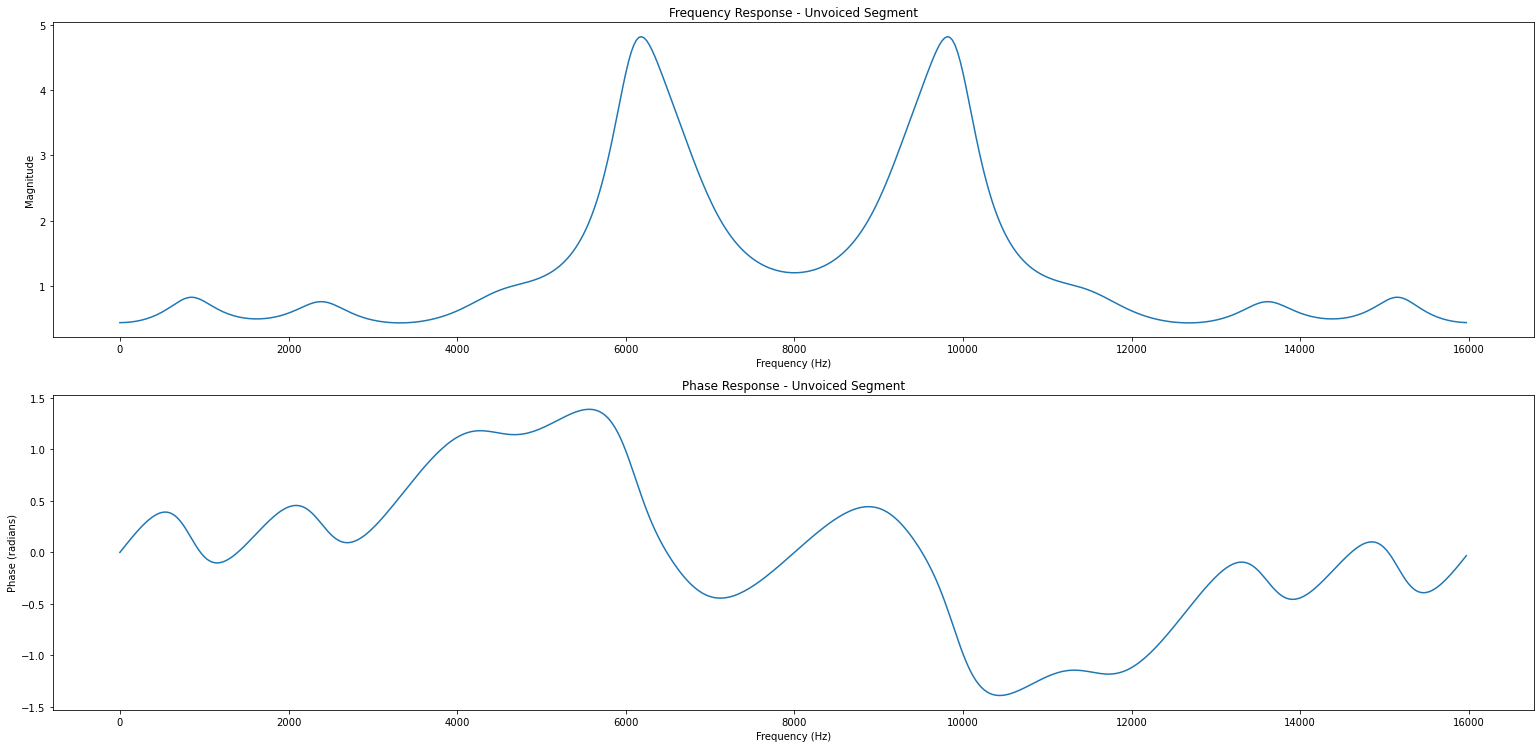

In [37]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.subplot(2, 1, 1)
plt.plot(frequency_response_unvoiced[0], np.abs(frequency_response_unvoiced[1]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Magnitude')
plt.title('Frequency Response - Unvoiced Segment')

plt.subplot(2, 1, 2)
plt.plot(frequency_response_unvoiced[0], np.angle(frequency_response_unvoiced[1]))
plt.xlabel('Frequency (Hz)')
plt.ylabel('Phase (radians)')
plt.title('Phase Response - Unvoiced Segment')

plt.tight_layout()
plt.show()

In [38]:
fft_voiced = np.fft.rfft(x1_voiced_hann)
fft_unvoiced = np.fft.rfft(x1_unvoiced_hann)

fft_voiced.shape


(257,)

In [39]:
fft_unvoiced.shape

(257,)

In [40]:
fft_voiced_dB = 10 * np.log10(np.abs(fft_voiced)+ 10**(-15))
filter_mag_dB = 10 * np.log10(np.abs(frequency_response_voiced[1]) + 10**(-15))
freq_axis = np.linspace(0, sample_rate / 2, fft_voiced.shape[0])

In [41]:
frequency_response_voiced[0].shape

(512,)

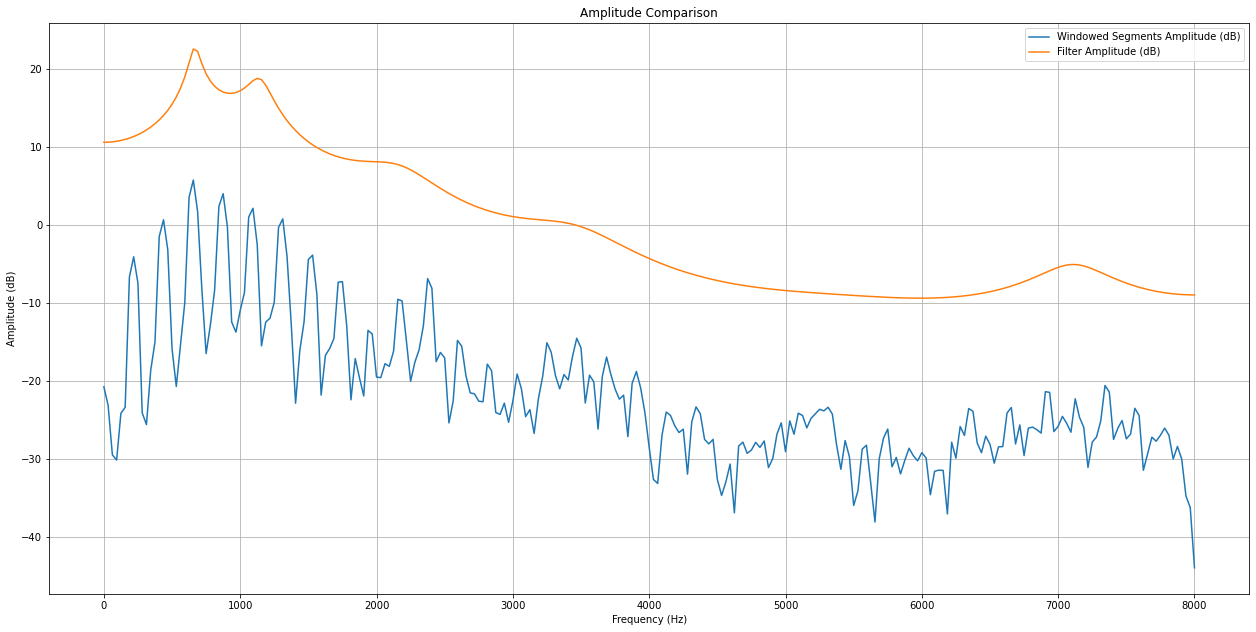

In [43]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.plot(freq_axis, fft_voiced_dB, label='Windowed Segments Amplitude (dB)')
plt.plot(freq_axis, filter_mag_dB[:257], label='Filter Amplitude (dB)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Amplitude Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [44]:
fft_unvoiced_dB = 10 * np.log10(np.abs(fft_unvoiced)+ 10**(-15))
filter_mag_dB_unvoiced = 10 * np.log10(np.abs(frequency_response_unvoiced[1]) + 10**(-15))
freq_axis_unvoiced = np.linspace(0, sample_rate / 2, fft_unvoiced.shape[0])

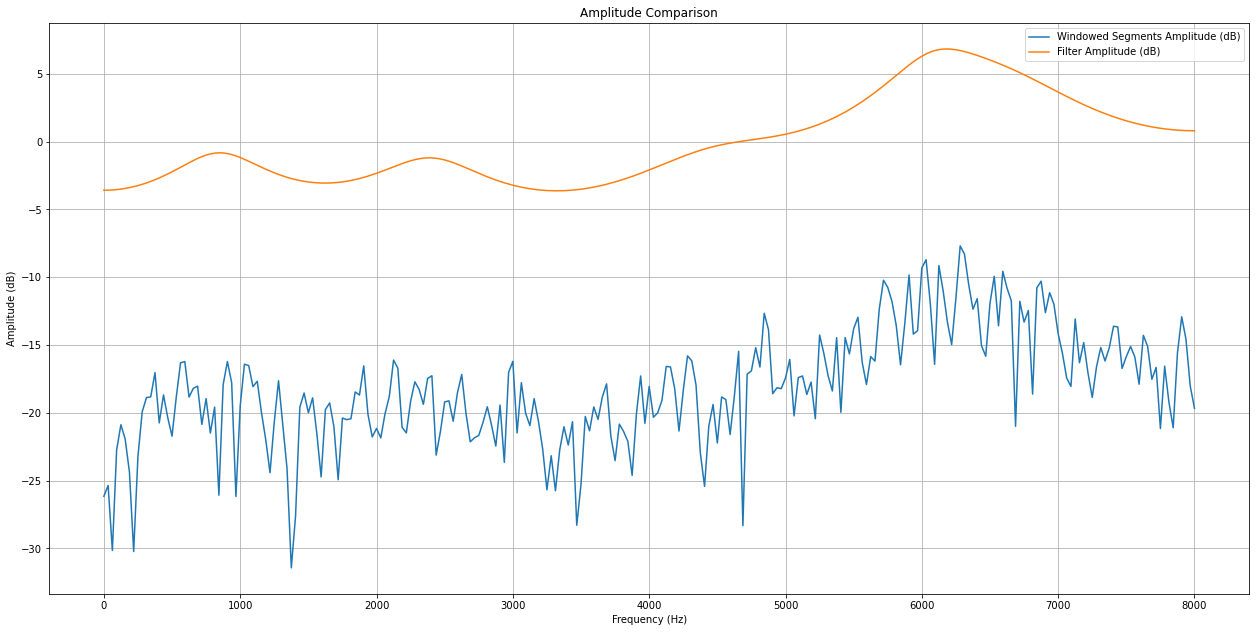

In [51]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.plot(freq_axis_unvoiced, fft_unvoiced_dB, label='Windowed Segments Amplitude (dB)')
plt.plot(freq_axis_unvoiced, filter_mag_dB_unvoiced[:257], label='Filter Amplitude (dB)')
plt.xlabel('Frequency (Hz)')
plt.ylabel('Amplitude (dB)')
plt.title('Amplitude Comparison')
plt.legend()
plt.grid(True)
plt.show()

In [61]:
e_voiced = lfilter(np.concatenate(([1], coefficients_voiced)), 1, speech1_data_voiced)
e_voiced.shape

(512,)

In [62]:
e_unvoiced = lfilter(np.concatenate(([1], coefficients_unvoiced)), 1, speech1_data_unvoiced)
e_unvoiced.shape

(512,)

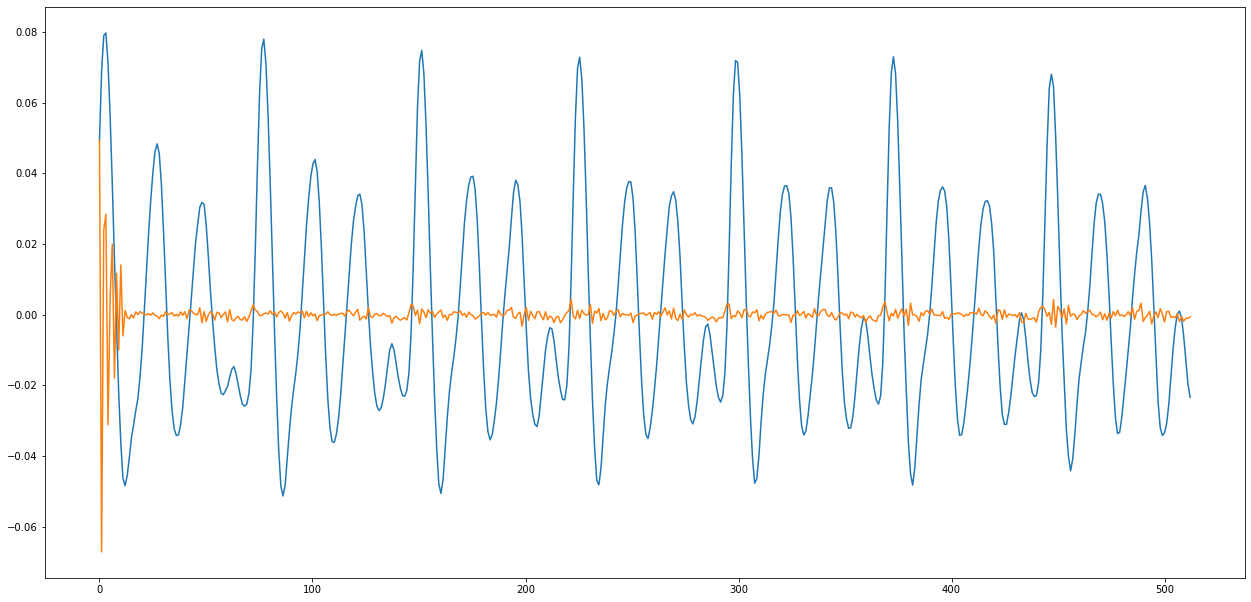

In [65]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.plot(np.linspace(0,len(speech1_data_voiced),len(speech1_data_voiced)),speech1_data_voiced)
plt.plot(np.linspace(0, len(e_voiced), len(e_voiced)), e_voiced)
plt.show()

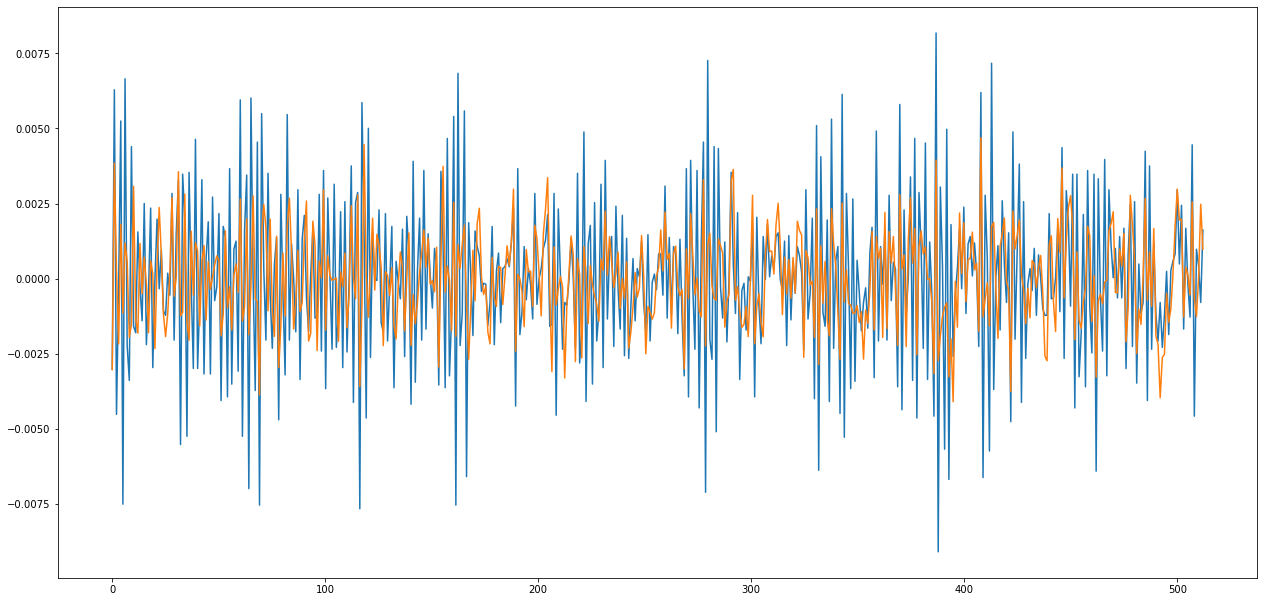

In [66]:
fig = plt.gcf()
fig.set_size_inches(21.5, 10.5)
plt.plot(np.linspace(0,len(speech1_data_unvoiced),len(speech1_data_unvoiced)),speech1_data_unvoiced)
plt.plot(np.linspace(0, len(e_unvoiced), len(e_unvoiced)), e_unvoiced)
plt.show()